In [1]:
from fastcore.all import *
from duckduckgo_search import DDGS #  Web-Recherche, Bildersuche oder Datensammlung

## Download Images

In [2]:
def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords=keywords, max_results=max_images)).itemgot('image')

In [4]:
# test image suche
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

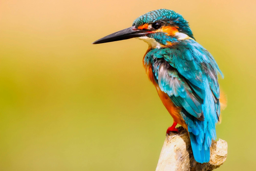

In [7]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(url=urls[0], dest=dest, show_progress=False)


from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

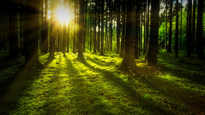

In [8]:
download_url(url=search_images('forest photos', max_images=1)[0], dest='forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(205,205)

In [ ]:
searches = 'forest','snake'
path = Path('snake_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(30)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(30)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(30)
    resize_images(path/o, max_size=400, dest=path/o)

NameError: name 'searches' is not defined

## Train the model

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

NameError: name 'path' is not defined

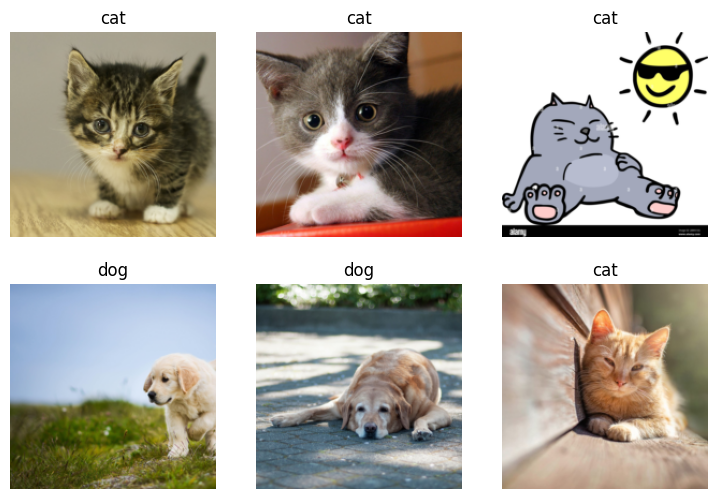

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='aquish')]
).dataloaders(path)

dls.show_batch(max_n=6)

## Train the model

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.688778,0.381536,0.112583,00:45


/opt/miniconda3/envs/fastai/lib/python3.10/site-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.347975,0.285065,0.076159,00:48
1,0.221757,0.276348,0.056291,00:48
2,0.169997,0.284533,0.072848,00:49
3,0.124725,0.305176,0.056291,00:49
4,0.094020,0.311288,0.052980,00:48


In [22]:
learn.export('model.pkl')